In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

from tensorflow import keras

In [2]:
data = pd.read_csv('water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


                   missing
ph               14.987790
Hardness          0.000000
Solids            0.000000
Chloramines       0.000000
Sulfate          23.840049
Conductivity      0.000000
Organic_carbon    0.000000
Trihalomethanes   4.945055
Turbidity         0.000000
Potability        0.000000


<AxesSubplot:>

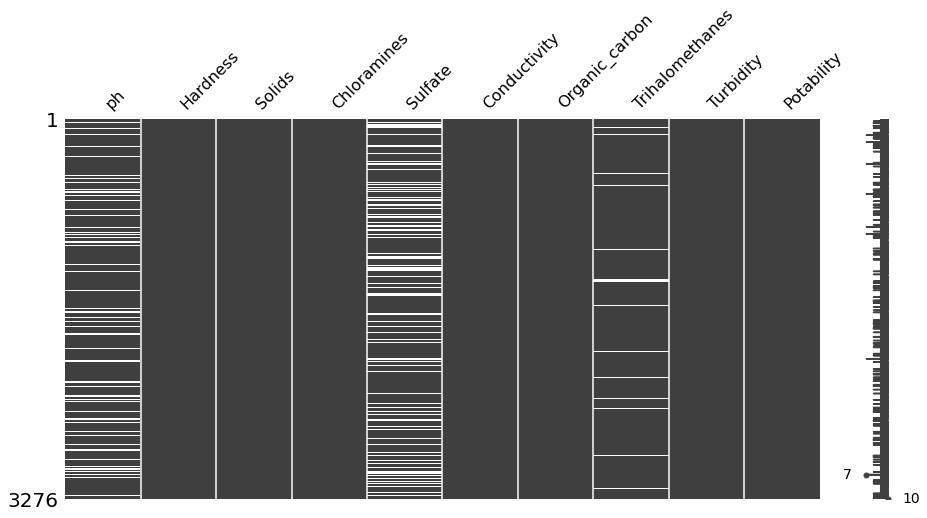

In [6]:
mis_val = (pd.isna(data).sum()/len(data))*100
mis_val = pd.DataFrame(mis_val, columns=['missing'])
print(mis_val)
msno.matrix(data, figsize=(15,7))

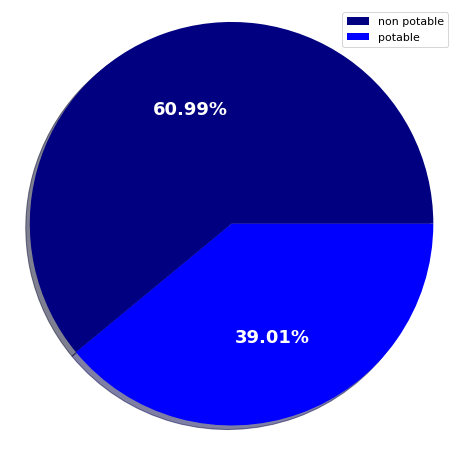

In [7]:
#data['Potability'].value_counts(normalize=True)
plt.figure(figsize=(8,8), facecolor='white')
plt.pie(data['Potability'].value_counts(), labels=None, autopct='%0.2f%%', shadow=True, 
        textprops={'fontweight':'bold', 'fontsize':18, 'color':'white'}, colors=['navy', 'blue'])
plt.axis('equal')
plt.legend(labels=['non potable', 'potable'], loc='upper right', fontsize=11)

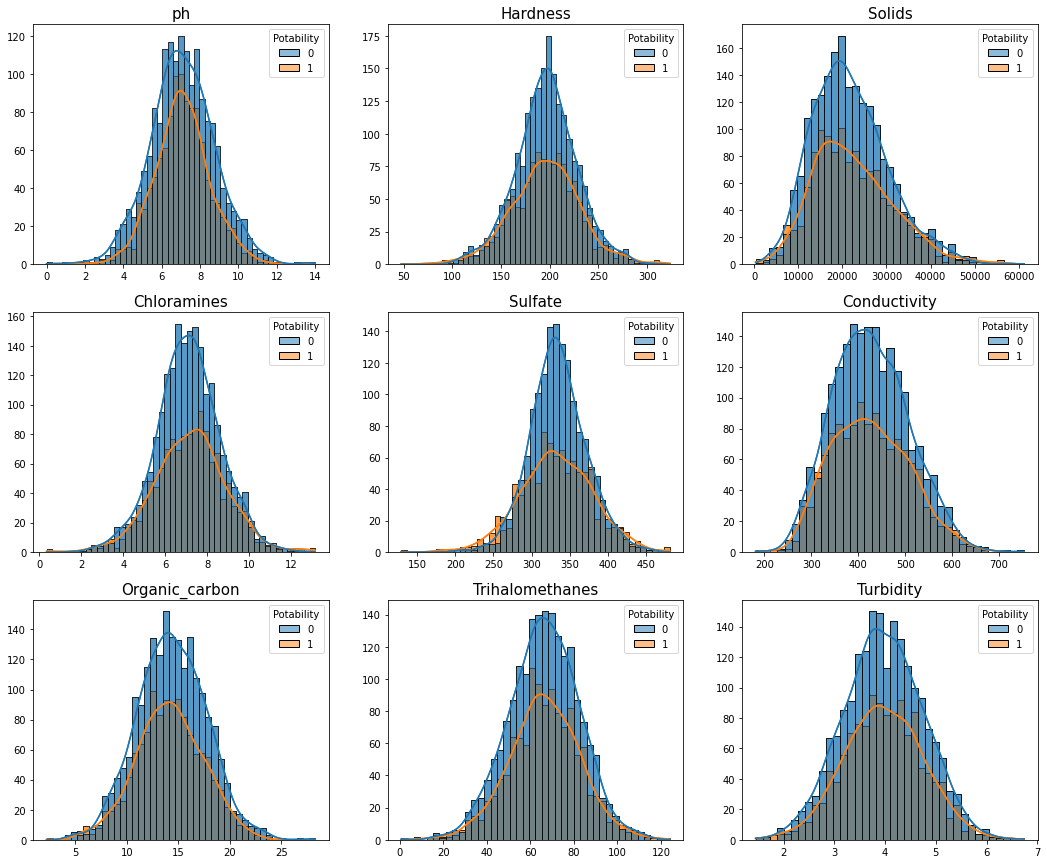

In [8]:
plt.figure(figsize=(18,15), facecolor='white')
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col, fontsize=15)
    sns.histplot(data=data, x=col, hue='Potability', kde=True)
    sns.histplot(data=data, x=col, hue='Potability', kde=True)
    plt.xlabel('')
    plt.ylabel('')

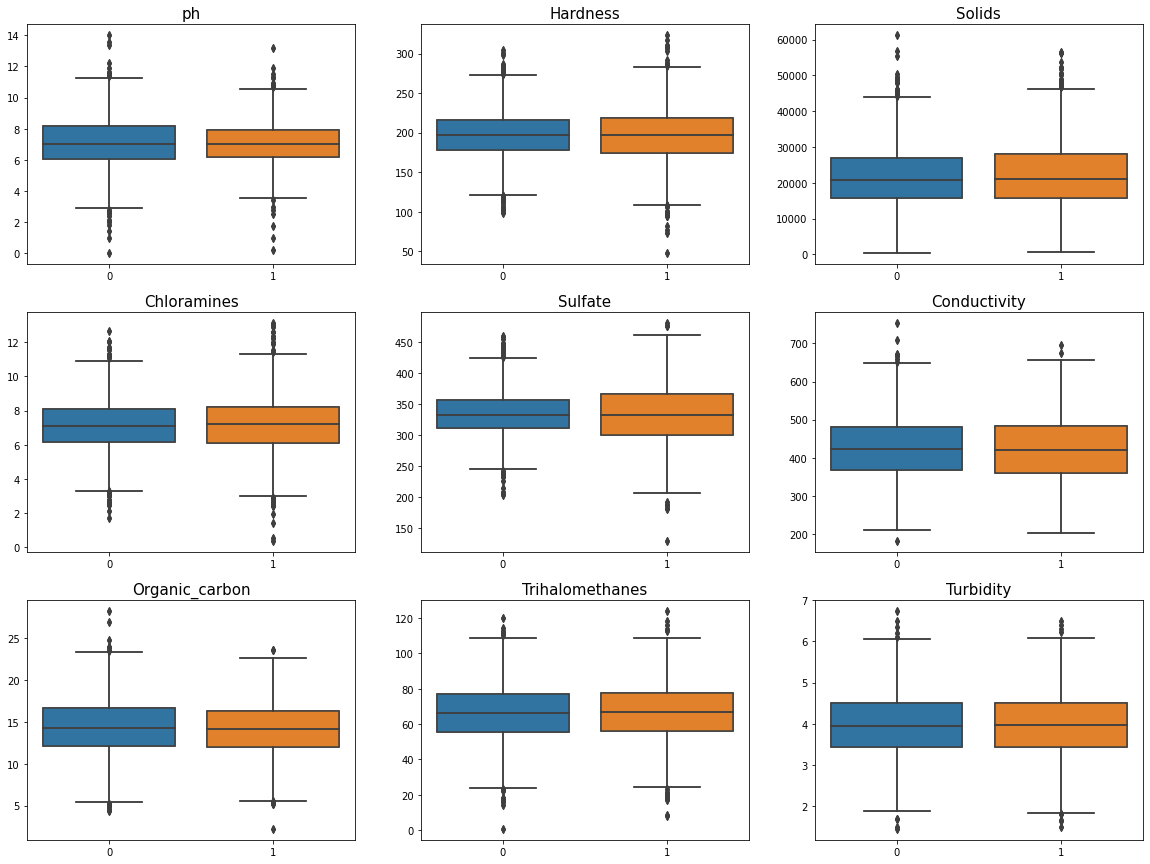

In [9]:
plt.figure(figsize=(20,15), facecolor='white')
for ax, col in enumerate(data.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col, fontsize=15)
    sns.boxplot(data=data, y=col, x='Potability')
    sns.boxplot(data=data, y=col, x='Potability')
    plt.xlabel('')
    plt.ylabel('')

<AxesSubplot:>

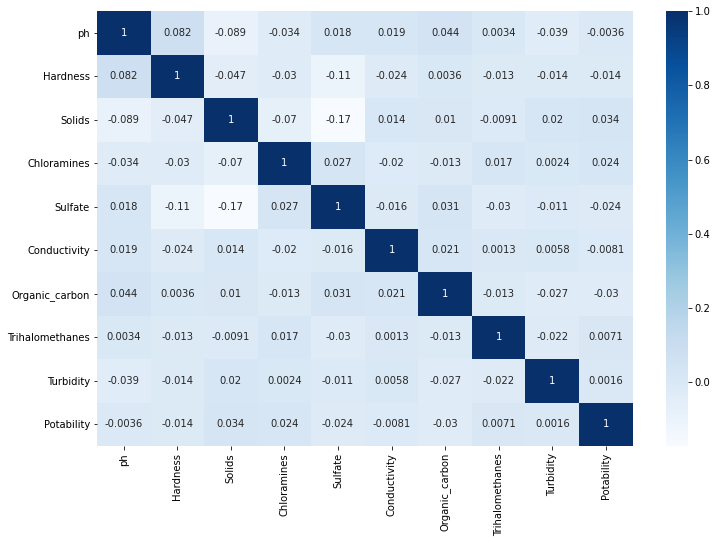

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

<AxesSubplot:xlabel='feature', ylabel='correlation'>

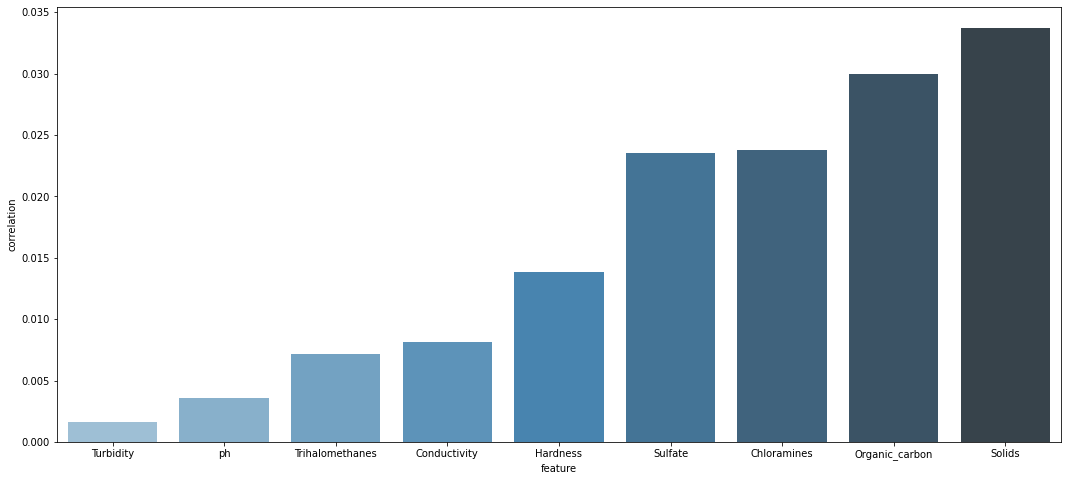

In [11]:
plt.figure(figsize=(18,8))
corr_w_target=abs(data.iloc[:,:-1].corrwith(pd.Series(data['Potability'])))
corr_w_target=pd.DataFrame(corr_w_target, columns=["correlation"])
corr_w_target["feature"]=corr_w_target.index
corr_w_target=corr_w_target.sort_values("correlation")
sns.barplot(data=corr_w_target,x=corr_w_target["feature"], y=corr_w_target["correlation"],palette='Blues_d')

In [12]:
scale = StandardScaler()
X = data.iloc[:,:-1].fillna(data.median())
y = data.iloc[:,-1]
scale.fit_transform(X)

array([[-2.54735465e-02,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28471739e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.97319183e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59565368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32494885e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.44611034e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
y_test.value_counts()

0    394
1    262
Name: Potability, dtype: int64

In [14]:
lr = LogisticRegression(random_state=123, max_iter=100, class_weight='balanced').fit(X_train, y_train)
print(cross_val_score(lr, X_train, y_train, scoring='accuracy').mean())

0.5061068702290077


In [15]:
y_pred = lr.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy wynosi: {}, auc wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0    1
Potability          
0           218  176
1           136  126 
 accuracy wynosi: 0.524, auc wynosi: 0.517


In [16]:
params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0.0001,10,100)
}

In [17]:
gdsearch = GridSearchCV(lr, param_grid=params, cv=5, scoring='accuracy').fit(X_train, y_train)
print(gdsearch.best_params_, gdsearch.score(X_train, y_train))

{'C': 0.0001, 'penalty': 'l2'} 0.5206106870229008


In [137]:
lr = LogisticRegression(random_state=123, max_iter=1000, C=0.0001, penalty='l2', class_weight='balanced').fit(X_train, y_train)
y_pred = lr.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy test wynosi: {}, auc test wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0    1
Potability          
0           218  176
1           136  126 
 accuracy test wynosi: 0.524, auc test wynosi: 0.517


In [138]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, max_features = 9, random_state=123).fit(X_train, y_train)
cross_val_score(dt, X_train, y_train, scoring='accuracy').mean()

0.6270992366412214

In [139]:
y_pred = dt.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy test wynosi: {}, auc test wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0   1
Potability         
0           379  15
1           222  40 
 accuracy test wynosi: 0.639, auc test wynosi: 0.557


In [140]:
params = {
    'max_depth' : np.arange(1,21),
    'min_samples_leaf' : np.arange(1,16),
    'max_features' : np.arange(1,10)
}

In [100]:
gdsearch = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid=params, cv=5).fit(X_train, y_train)
print(gdsearch.best_params_, gdsearch.best_score_)

{'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 7} 0.6572519083969466


In [141]:
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=7, max_features = 6, random_state=123).fit(X_train, y_train)
y_pred = dt.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy test wynosi: {}, auc test wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0   1
Potability         
0           359  35
1           198  64 
 accuracy test wynosi: 0.645, auc test wynosi: 0.578


In [142]:
rf = RandomForestClassifier(n_estimators = 500, max_depth=5, min_samples_leaf=5, max_features = 3, random_state=123).fit(X_train, y_train)
cross_val_score(rf, X_train, y_train, scoring='accuracy').mean()

0.6396946564885496

In [143]:
y_pred = rf.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy test wynosi: {}, auc test wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0   1
Potability         
0           387   7
1           221  41 
 accuracy test wynosi: 0.652, auc test wynosi: 0.569


In [144]:
params = {
    'max_depth' : np.arange(4,9),
    'min_samples_leaf' : np.arange(4,9),
    'n_estimators' : [100,500]
}

In [145]:
gdsearch = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=params, cv=5).fit(X_train, y_train)
print(gdsearch.best_params_, gdsearch.best_score_)

{'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 100} 0.6541984732824428


In [111]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=6, max_features = 5, random_state=123).fit(X_train, y_train)
y_pred = rf.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy test wynosi: {}, auc test wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0   1
Potability         
0           362  32
1           193  69 
 accuracy test wynosi: 0.683, auc test wynosi: 0.591


In [119]:
adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=2, learning_rate=1.0, random_state=123).fit(X_train, y_train)
cross_val_score(adab, X_train, y_train, scoring='accuracy').mean()

0.6152671755725191

In [113]:
y_pred = adab.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy test wynosi: {}, auc test wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0   1
Potability         
0           388   6
1           243  19 
 accuracy test wynosi: 0.76, auc test wynosi: 0.529


In [114]:
params = {
    'n_estimators' : np.arange(1,4),
    'learning_rate' : np.linspace(0.001,6,100)
}

In [116]:
gdsearch = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=123), param_grid=params, cv=5).fit(X_train, y_train)
print(gdsearch.best_params_, gdsearch.best_score_)

{'learning_rate': 0.36457575757575755, 'n_estimators': 3} 0.6232824427480916


In [117]:
adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=3, learning_rate=0.365, random_state=123).fit(X_train, y_train)
y_pred = adab.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred)
acc = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(conf_matrix, '\n accuracy test wynosi: {}, auc test wynosi: {}'.format(round(acc,3), round(auc,3)))

col_0         0   1
Potability         
0           380  14
1           233  29 
 accuracy test wynosi: 0.674, auc test wynosi: 0.538


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [86]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(8,activation='sigmoid'),
    keras.layers.Dense(4,activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [87]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))

Epoch 1/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6119 - val_loss: 0.6775 - val_accuracy: 0.5880
Epoch 2/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6119 - val_loss: 0.6771 - val_accuracy: 0.5880
Epoch 3/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.6119 - val_loss: 0.6778 - val_accuracy: 0.5880
Epoch 4/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6119 - val_loss: 0.6788 - val_accuracy: 0.5880
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6119 - val_loss: 0.6788 - val_accuracy: 0.5880
Epoch 6/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.6119 - val_loss: 0.6791 - val_accuracy: 0.5880
Epoch 7/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.6119 - val_loss: 0.6789 - val_accuracy: 0.5880
Epoch 8/20
51/51 [==

<AxesSubplot:>

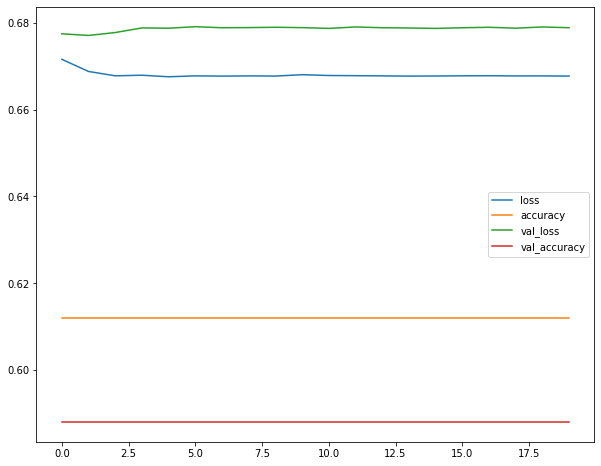

In [89]:
pd.DataFrame(history.history).plot(figsize=(10,8))